In [3]:
import sys, os
sys.path.insert(0,"../code")

import pandas as pd
import numpy as np
import geopandas as gpd
import folium 
import pyproj
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from plotting import plot_ecdf

%load_ext autoreload
%autoreload 2

In [4]:
df_rides = pd.read_pickle(os.path.join("../data","df_rides.pickle"))

# Filter values

In [5]:
def filter_values(df_rides): 
    df_rides = df_rides.query("avg_speed_kmh<=50&avg_speed_kmh>0")
    df_rides = df_rides.query("trip_duration<60*60*24&trip_duration>0")
    return df_rides 

df_rides = filter_values(df_rides)

# Explorative Analysis

In [3]:
df_rides.shape
df_rides_sample = df_rides.sample(200000)

In [40]:
def plot_hist_ecdf(series, figsize=(10,5), hist_kwargs={}, ecdf_kwargs={}): 
    f,axs = plt.subplots(1,2, figsize=figsize)
    axs[0].hist(series,density=True, **hist_kwargs)
    axs[0].set_xlabel(series.name)
    plot_ecdf(series=series,ax=axs[1], xlabel=series.name, **ecdf_kwargs)
    return axs 

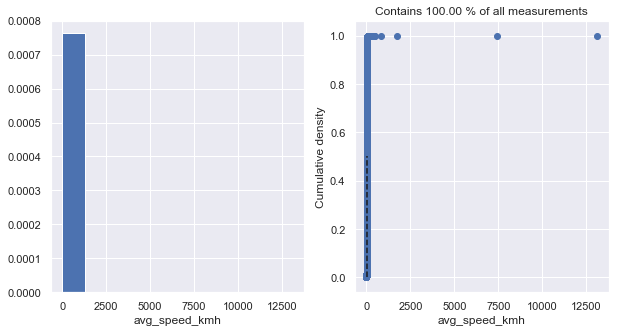

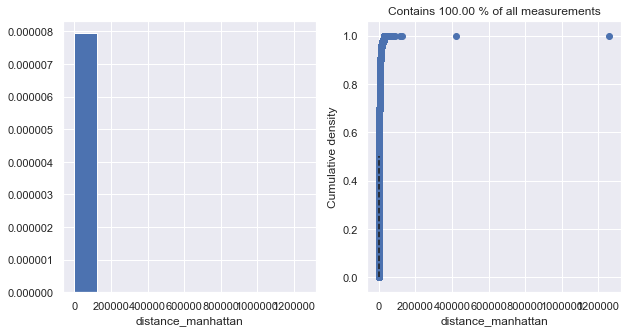

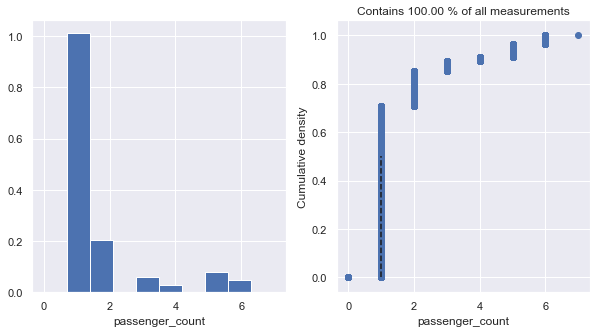

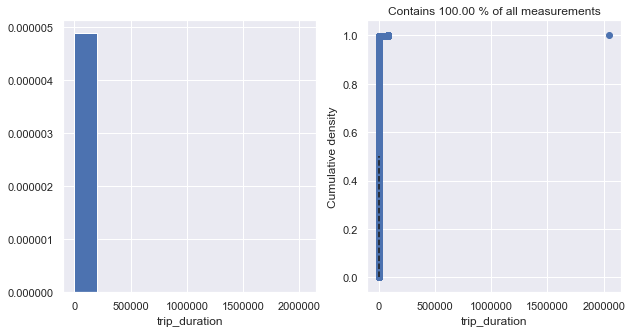

In [41]:
cols = {'avg_speed_kmh','distance_manhattan','passenger_count','trip_duration']

for col in cols: 
    plot_hist_ecdf(df_rides_sample[col]); 

## Mapping 

In [6]:
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.GeoDataFrame.from_file(nybb_path)
boros = boros.set_index('BoroCode')
boros = boros.sort_index().to_crs({'init': 'epsg:32618'})
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((583578.4583567664 4504203.877303327...
2,Bronx,464392.991824,1.186925e+09,"(POLYGON ((593066.6583063279 4516675.6980787, ..."
3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((595882.1112206138 4492983.277214446...
4,Queens,896344.047763,3.045213e+09,(POLYGON ((598434.3019403419 4494444.181119728...
5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((580375.2841421565 4491060.737086785...


(4475000, 4560000)

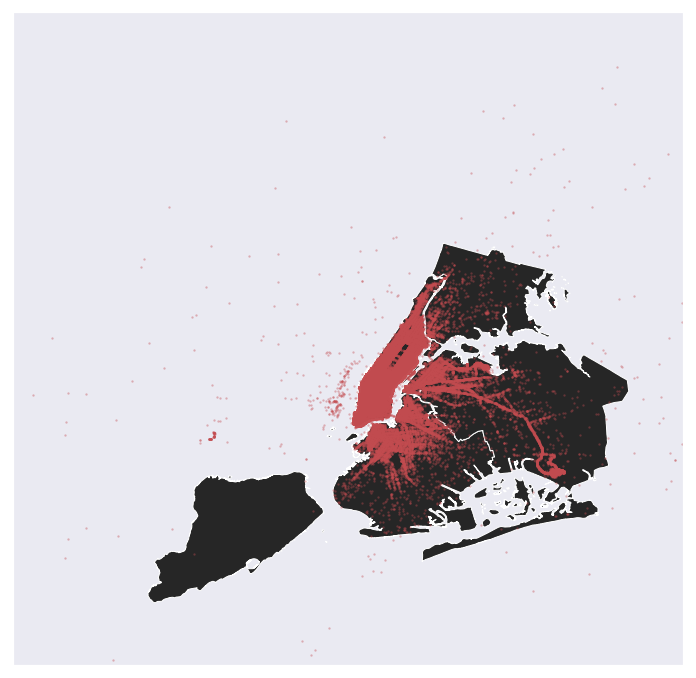

In [7]:
f,ax = plt.subplots(1,1,figsize=(12,12))                                        
boros.plot(ax=ax,facecolor=[0.15,0.15,0.15])
ax.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
df_scatter = df_rides.sample(frac=1.0)
ax.scatter(df_scatter.pickup_x_utm, df_scatter.pickup_y_utm, alpha=0.25, c='r', marker='.', s=10)
ax.set_xlim([550000, 615000])
ax.set_ylim([4475000, 4560000])

(4475000, 4560000)

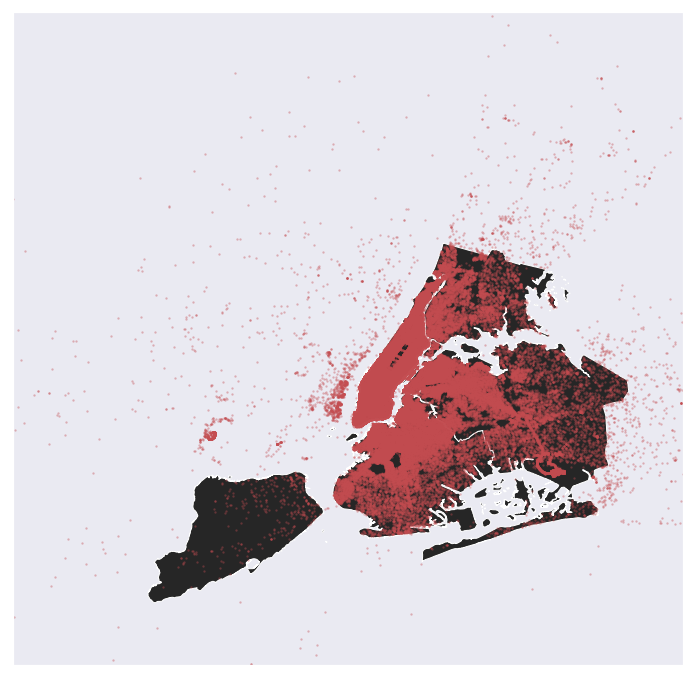

In [8]:
f,ax = plt.subplots(1,1,figsize=(12,12))                                        
boros.plot(ax=ax,facecolor=[0.15,0.15,0.15])
ax.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
df_scatter = df_rides.sample(frac=1.0)
ax.scatter(df_scatter.dropoff_x_utm, df_scatter.dropoff_y_utm, alpha=0.25, c='r', marker='.', s=10)
ax.set_xlim([550000, 615000])
ax.set_ylim([4475000, 4560000])

(4475000, 4540000)

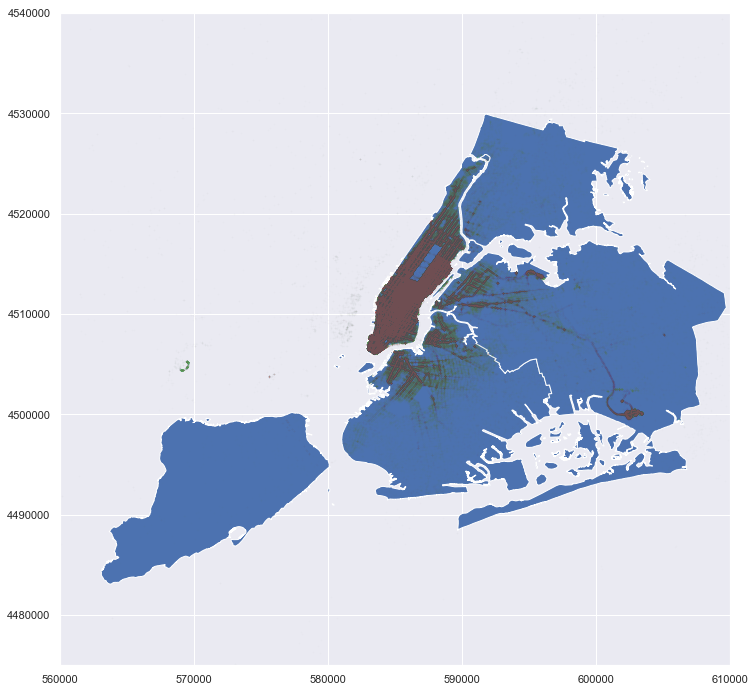

In [9]:
f,ax = plt.subplots(1,1,figsize=(12,12))                                        
boros.plot(ax=ax)
df_scatter = df_rides.sample(10000)
ax.scatter(df_rides.dropoff_x_utm,df_rides.dropoff_y_utm,alpha=0.01, marker='.',s=1,c='g')
ax.scatter(df_rides.pickup_x_utm,df_rides.pickup_y_utm,alpha=0.01, marker='.',s=1,c='r')
ax.set_xlim([560000, 610000])
ax.set_ylim([4475000, 4540000])

In [ ]:
f,ax = plt.subplots(1,1, figsize=(12,12))
df_scatter = df_rides.sample(frac=0.15, random_state=42)
boros.plot(ax=ax)
ax.plot(np.stack((df_scatter.pickup_x_utm, df_scatter.dropoff_x_utm)), np.stack((df_scatter.pickup_y_utm, df_scatter.dropoff_y_utm)), c='r', alpha=0.5); 

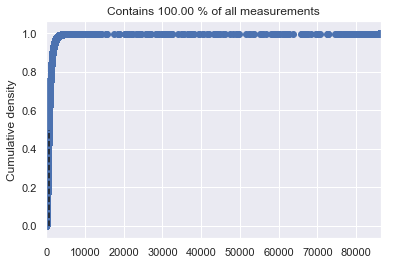

In [24]:
from plotting import plot_ecdf
plot_ecdf(series=df_rides.trip_duration,xlim=(0,3600*24))